## Machine learning model for predicting late recurrence of atrial fibrillation after catheter ablation 

In this Jupyter notebook, we're showing a machine-learning model for predicting late recurrence of atrial fibrillation (LRAF) during the first year after catheter ablation. LRAF is a common and significant clinical problem. Our study aimed to create a machine-learning model that solves the classification task and predicts 1-year arrhythmic recurrence after catheter ablation.

This model is described in the preprint available under the following link: https://www.researchsquare.com/article/rs-2850534/v1.

# About dataset

Dataset contains in 50+ clinical, laboratory and general variables:
- LRAF (Target variable): Late recurrence of atrial fibrillation (LRAF) defined as ...
- Age (years): age at the time of inclusion in the study is considered as a demographic patient characteristic 
- Smoking: smoking of tobacco via cigarettes or loose tobacco
- BMI, kg/m2: General Body mass index (BMI) defined as the weight divided by the square of the body height and is expressed in units of kg/m2
- ERAF: Early recurrence of atrial fibrillation (ERAF) defined as at least a 30-second episode of arrhythmia (AF, atrial tachycardia [AT], or atrial flutter [AFL])  registered by a 24h-Holter monitor within the 3 months following the procedure.
- [tutaj skopiujemy jak będzie finalna lista i opisy]

Full list of variables is presented in Table S1.

For illustrative purposes and to improve the reproducibility of this research, we publish and describe in this notebook anonymized randomly selected subset of dataset.

In [3]:
import xgboost
import pickle
with open('xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

[12:20:24] WARNING: /root/repo/packages/xgboost/build/xgboost-1.6.1/build/temp.emscripten_3_1_32_wasm32-cpython-311/xgboost/src/learner.cc:1040: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

[12:20:24] WARNING: /root/repo/packages/xgboost/build/xgboost-1.6.1/build/temp.emscripten_3_1_32_wasm32-cpython-311/xgboost/src/learner.cc:749: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
[12:20:24] WARNING: /root/repo/packages/xgboost/build/xgboost-1.6.1/build/temp.emscripten_3_1_32_wasm32-cpython-311/xgboost/src/learner.cc:438: 
  If you are loading a

In [4]:
xgb_model

# About XGB model

All models presented in the article were cross-validated on the complete dataset. We now present selected XGBoost model which showed the best performance on the testing cohort, with the highest AUC of 0.75 [95% confidence interval 0.7395, 0.7653]. 

Based on the expertise of cardiologists, an additional variable (HAS-BLED score) was also included to increase the explainability of this model. 

# List of features selected for the XGB model:
- BMI
- Diastolic BP before
- ERAF
- Fibrinogen after
- Glucose mg/dl before
- HAS-BLED score
- HDL mg/dl before
- Hemoglobin after
- RBC 10e6/µl after
- Statin therapy
- TSH uIU/ml
- TroponinT_hs ng/ml after
- Urea mg/dl before


In [27]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=15,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5294117647058822,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# About Shapley Values


In order to get a better grasp on the detailed model's performance, we used SHAP (SHapley Additive exPlanations), which is a game theoretic approach to explain the output of any machine learning model. 

Firstly, we created a so-called beeswarm plot for our XGB model using the training set. On the vertical axis we see all the features, ranked in descending order of their impact on prediction, while the horizontal axis represents the SHAP value. The color of the point shows whether that particular observation has a higher/lower value, when compared to other observations. 

We can see, for example, that an early recurrence of atrial fibrillation (ERAF) has a positive impact on the prediction of LRAF.

In [8]:
import shap
import pandas as pd

example_train_set = pd.read_csv("example_train_set.csv")

explainer = shap.Explainer(xgb_model)
shap_values_train = explainer(example_train_set)
shap.plots.beeswarm(shap_values_train, max_display = 13, show = False)

<class 'ModuleNotFoundError'>: No module named 'shap'

# About Local Explanations

Above, we have provided a global explanation for our model. To illustrate local results, we selected 10 patients at random from the test set. 

In [136]:
test_set, test_set_y = pd.read_csv("example_test_set_random.csv"), pd.read_csv("example_test_set_y_random.csv")
test_set_y = test_set_y.to_numpy().reshape((-1,))
test_set

,BMI,Fibrinogen after,Glucose mg/dl before,HDL mg/dl before,Hemoglobin after,ERAF,RBC 10e6/µl after,Diastolic BP before,Statin therapy,TSH uIU/ml,TroponinT_hs ng/ml after,Urea mg/dl before,HAS-BLED score
0,28.081600,366.0,106.0000,47.0000,12.2,0.0,3.94,75.0,18.656,1.560,0.769,30.0,1.0
1,25.476700,301.0,93.0000,60.0000,12.2,0.0,4.07,60.0,21.203,1.180,0.987,31.0,0.0
2,27.763430,286.0,96.0000,39.0000,13.6,1.0,4.40,75.0,0.000,1.280,0.313,46.0,2.0
3,26.753900,314.0,107.0000,74.0000,13.6,0.0,4.32,70.0,17.087,0.938,1.840,40.0,0.0
4,34.540542,416.0,103.1922,51.3092,15.5,1.0,5.41,98.0,0.000,1.190,0.254,35.0,1.0
5,30.071168,316.0,134.1847,52.6351,13.9,0.0,4.54,85.0,40.000,0.669,2.010,36.0,2.0
6,27.885200,298.0,98.2293,53.7635,12.7,0.0,3.86,70.0,16.517,0.729,0.571,34.0,2.0
7,33.800000,281.0,108.3411,57.5892,13.3,0.0,3.89,70.0,40.000,1.480,1.290,36.0,2.0
8,33.284024,281.0,102.0000,58.0000,12.8,0.0,3.80,85.0,20.000,0.755,0.812,42.0,1.0
9,32.031250,461.0,101.0000,86.0000,12.8,1.0,4.15,69.0,20.000,2.570,1.070,35.0,2.0


Using our model, we can predict late recurrence of atrial fibrillation for each of the chosen patients and create confusion matrix.

<AxesSubplot:>

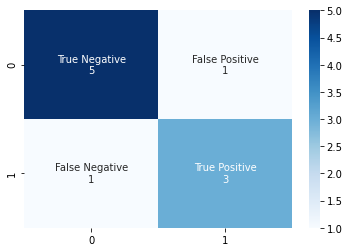

In [137]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns


pred = xgb_model.predict(test_set)
cf_matrix = confusion_matrix(test_set_y, pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

As we can see, the model provides satisfactory results. Let's take a closer look at misclassified patients. 

In [153]:
FP = np.array(np.where((test_set_y == 0) & (pred == 1))).tolist()[0][0]
FN = np.array(np.where((test_set_y == 1) & (pred == 0))).tolist()[0][0]

shap_example_test = explainer(example_test_set)

In order to show local explanations we used so-called waterfall plot that presents the main features affecting the prediction of a single observation, and the magnitude of the SHAP value for each feature. The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

For a false positive patient (prediction: +LRAF, ground truth: -LRAF) shown below we can see that the features mainly responsible for the incorrect prediction are RBC 10e6/µl after, HAS-BLED score and Statin therapy. 

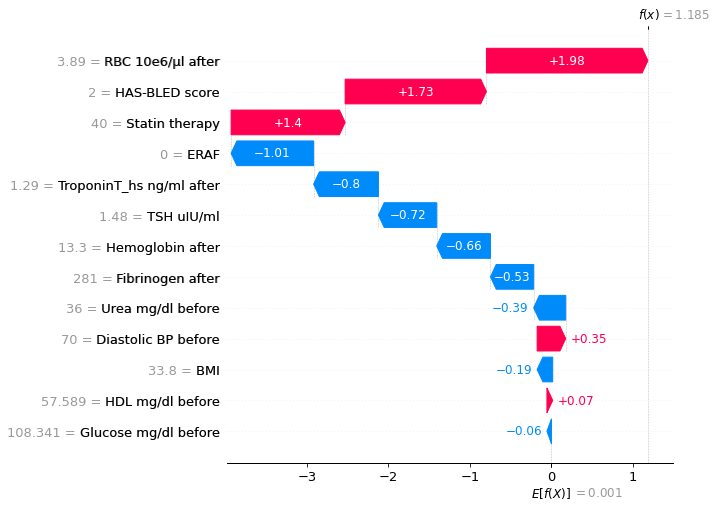

In [154]:
shap.plots.waterfall(shap_example_test[FP], max_display = 13)

Since waterfall plots only show a single sample worth of data, we can’t see the impact of changing any of above features. To see this we can use a scatter plot. 

Firstly, let's take a look at the plot for RBC 10e6/µl after. It shows how low values are a more positive predictor of LRAF that high values. For both HAS-BLED score and Statin therapy it is the opposite: high values are a more positive predictor of LRAF than low values.  So, for the false positive patient that we analyze the values of RBC 10e6/µl after, HAS-BLED score and Statin therapy highly indicated towards a positive value of LRAF.

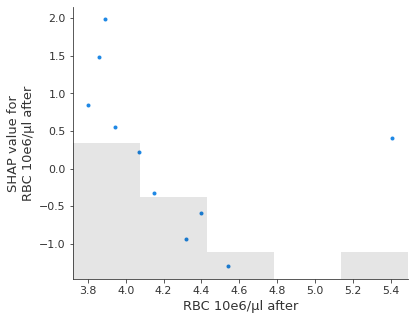

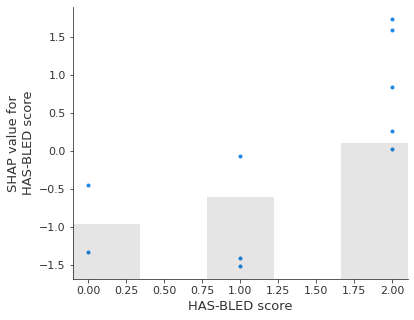

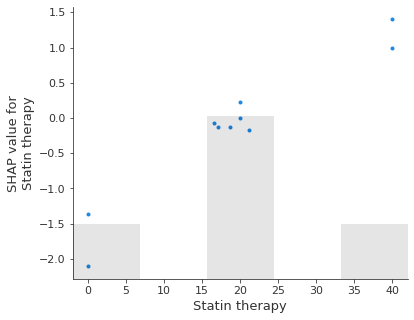

In [189]:
shap.plots.scatter(shap_example_test[:,"RBC 10e6/µl after"]),
shap.plots.scatter(shap_example_test[:,"HAS-BLED score"]),
shap.plots.scatter(shap_example_test[:,"Statin therapy"])

Now, let's check plots for a false negative patient (prediction: -LRAF, ground truth: +LRAF). As we can see below the features mainly responsible for the incorrect prediction are ERAF, TSH uIU/ml and Statin therapy. 

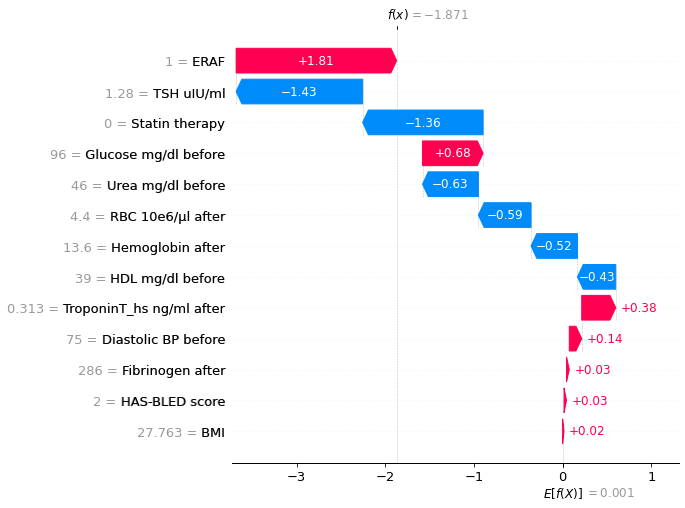

In [191]:
shap.plots.waterfall(shap_example_test[FN], max_display = 13)

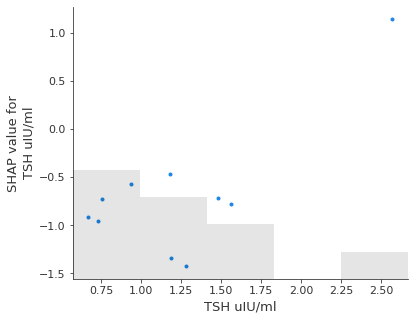

In [193]:
shap.plots.scatter(shap_example_test[:,"TSH uIU/ml"])

Although +ERAF is a strong predictor of +LRAF, low values of TSH uIU/ml and Statin therapy outweigh its impact for a false negative patient. 